In [1]:
import numpy as np

def remove_outliers_iqr(df, columns=None, factor=1.5):
    
    if columns is None:
        columns = df.columns
    
    # Ensure the specified columns are in the DataFrame
    columns = [col for col in columns if col in df.columns]
    
    # Calculate Q1, Q3, and IQR for the specified columns
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bounds = Q1 - factor * IQR
    upper_bounds = Q3 + factor * IQR
    
    # Create a mask to identify rows with values within bounds
    mask = np.all((df[columns] >= lower_bounds) & (df[columns] <= upper_bounds), axis=1)
    
    # Return the DataFrame with rows containing outliers removed
    return df[mask]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the DataFrame from the Parquet file
df = pd.read_parquet('numbikesavailable.parquet')

print(df.isna().sum())

df = df.set_index('record_timestamp').sort_index()
df.info()


record_timestamp    0
total_bikes         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34952 entries, 2024-06-02 18:37:00.476000+00:00 to 2024-07-29 00:57:00.443000+00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_bikes  34952 non-null  float64
dtypes: float64(1)
memory usage: 546.1 KB


In [3]:
df = remove_outliers_iqr(df)
display(df.describe())

,total_bikes
count,34219.000000
mean,17422.039510
std,1194.080374
min,14093.000000
25%,16719.000000
50%,17531.000000
75%,18382.000000
max,20633.000000


In [4]:
assert df['total_bikes'].isna().sum() == 0, "There are NaNs in the original data"


<Axes: title={'center': 'Total bikes docked'}, xlabel='record_timestamp'>

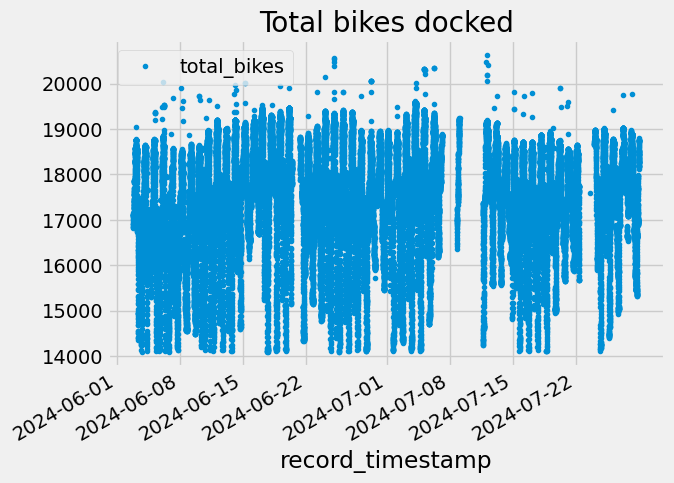

In [5]:
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
df.plot(style='.', title='Total bikes docked')

### Time partitions

<Axes: xlabel='record_timestamp'>

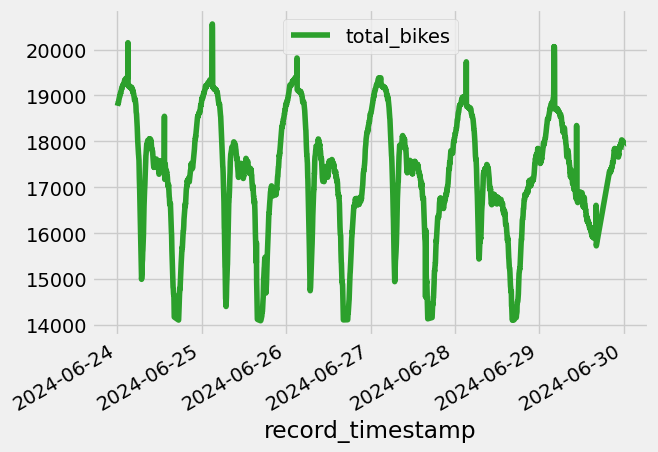

In [6]:
df.loc[(df.index > '2024-06-24') & (df.index < '2024-06-30')].plot(color=color_pal[2])

### Feature creation

In [7]:
def create_features(df):
    df['hour'] = df.index.hour
    df['minute'] = df.index.minute
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    df['dayofyear'] = df.index.dayofyear
    df['minuteofday'] = df['hour'] * 60 + df['minute']
    df['quarterhourofday'] = (df['hour'] * 4) + (df['minute'] // 15)
    return df

df = create_features(df)

/tmp/ipykernel_2968478/3713477900.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=df, x='hour', y='total_bikes', palette=color_pal)
/tmp/ipykernel_2968478/3713477900.py:3: UserWarning: 
The palette list has fewer values (10) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(ax=ax, data=df, x='hour', y='total_bikes', palette=color_pal)


Text(0.5, 1.0, 'bikes docked by hour')

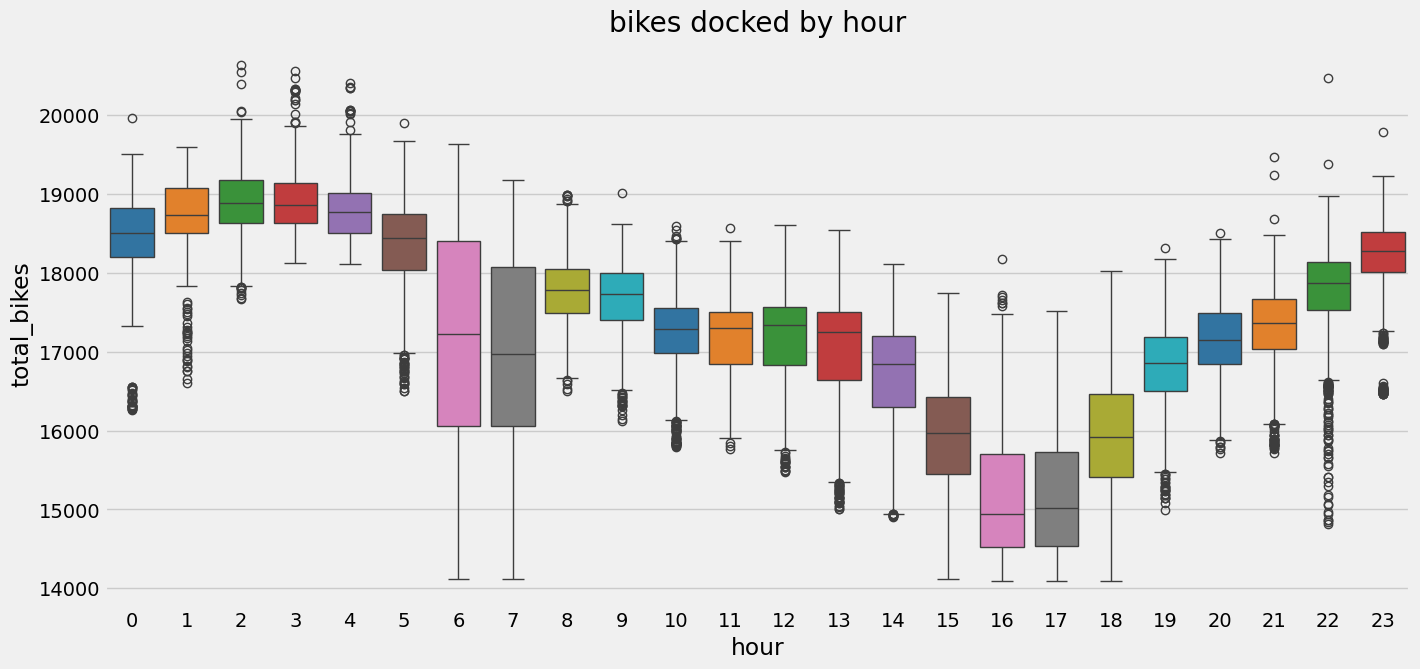

In [8]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.boxplot(ax=ax, data=df, x='hour', y='total_bikes', palette=color_pal)
ax.set_title('bikes docked by hour')

/tmp/ipykernel_2968478/4003975902.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=df, x='quarterhourofday', y='total_bikes', palette='Set2')


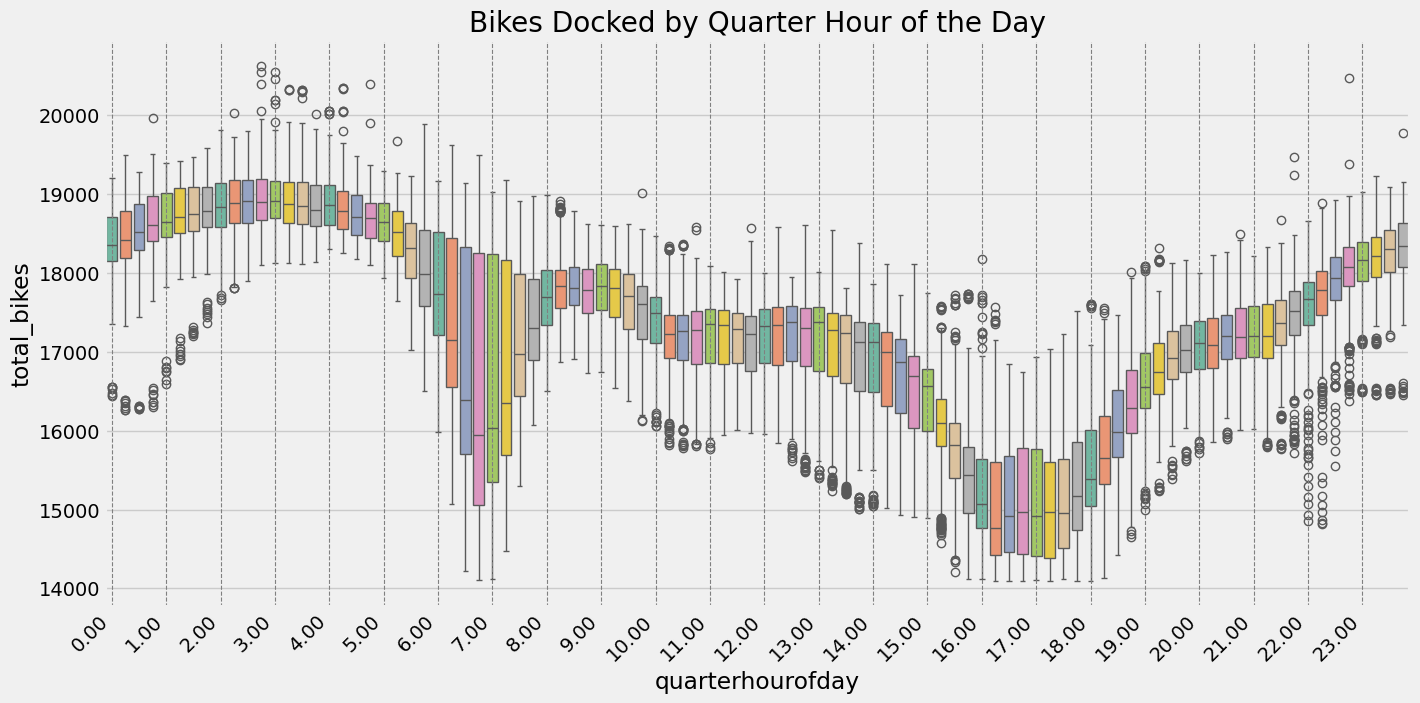

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 7))

# Replace `color_pal` with your actual color palette
sns.boxplot(ax=ax, data=df, x='quarterhourofday', y='total_bikes', palette='Set2')

# Set title
ax.set_title('Bikes Docked by Quarter Hour of the Day')

# Add vertical lines at each new hour
for hour in range(24):
    quarterhour = hour * 4
    ax.axvline(x=quarterhour, color='gray', linestyle='--', linewidth=0.8)

# Adjust x-axis labels to show only whole hours
xticks = ax.get_xticks()
xticklabels = [f'{int(tick // 4)}.00' if tick % 4 == 0 else '' for tick in xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=45, ha='right')

plt.show()


In [10]:
# separation feat / target

FEATURES = ['hour', 'dayofweek', 'month', 'dayofyear']
TARGET = 'total_bikes'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]


NameError: name 'train' is not defined

/tmp/ipykernel_2109977/1355863848.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=df, y='quarterhourofday', x='total_bikes', palette='Set2', orient='h')


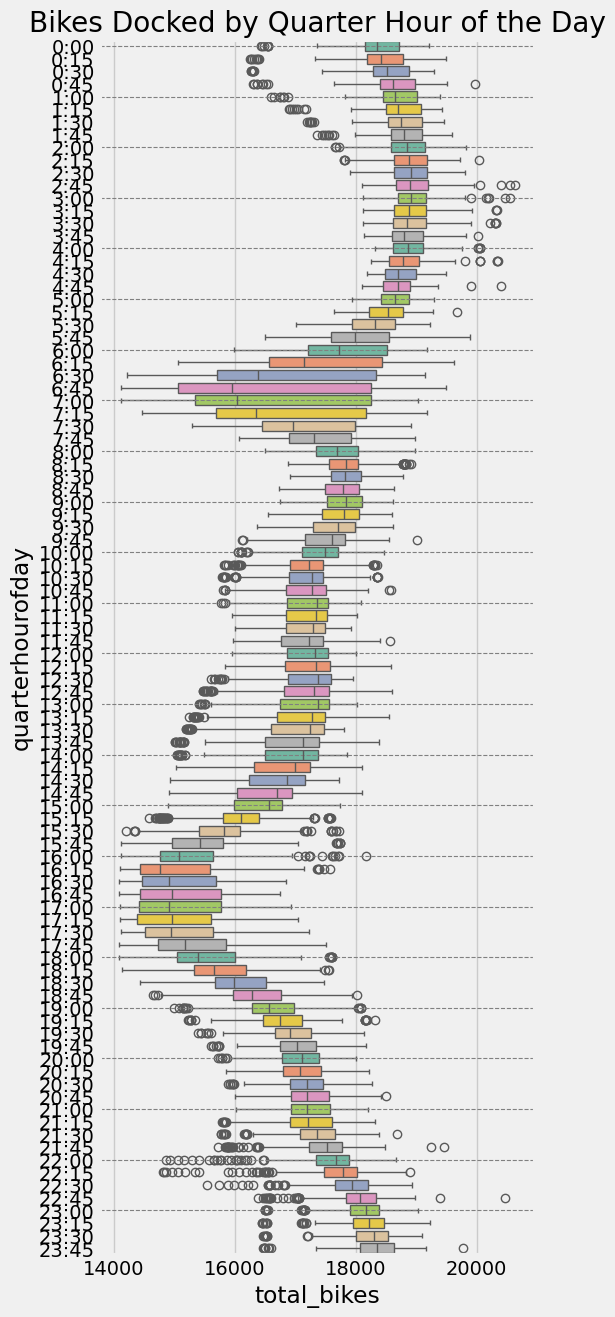

In [ ]:
fig, ax = plt.subplots(figsize=(5, 15))

# Plot horizontal boxplot (vertical orientation of boxplots)
sns.boxplot(ax=ax, data=df, y='quarterhourofday', x='total_bikes', palette='Set2', orient='h')

# Set title
ax.set_title('Bikes Docked by Quarter Hour of the Day')

# Add vertical lines at each new hour
for hour in range(24):
    quarterhour = hour * 4
    ax.axhline(y=quarterhour, color='gray', linestyle='--', linewidth=0.8)

# Adjust y-axis labels
yticks = ax.get_yticks()
yticklabels = [f'{hour // 4}:{(hour % 4) * 15:02d}' for hour in yticks]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, rotation=0, ha='right')

plt.show()

/tmp/ipykernel_2109977/1071777296.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=df, x='dayofweek', y='total_bikes', palette=color_pal)
/tmp/ipykernel_2109977/1071777296.py:3: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.boxplot(ax=ax, data=df, x='dayofweek', y='total_bikes', palette=color_pal)


Text(0.5, 1.0, 'bikes docked by day of the week')

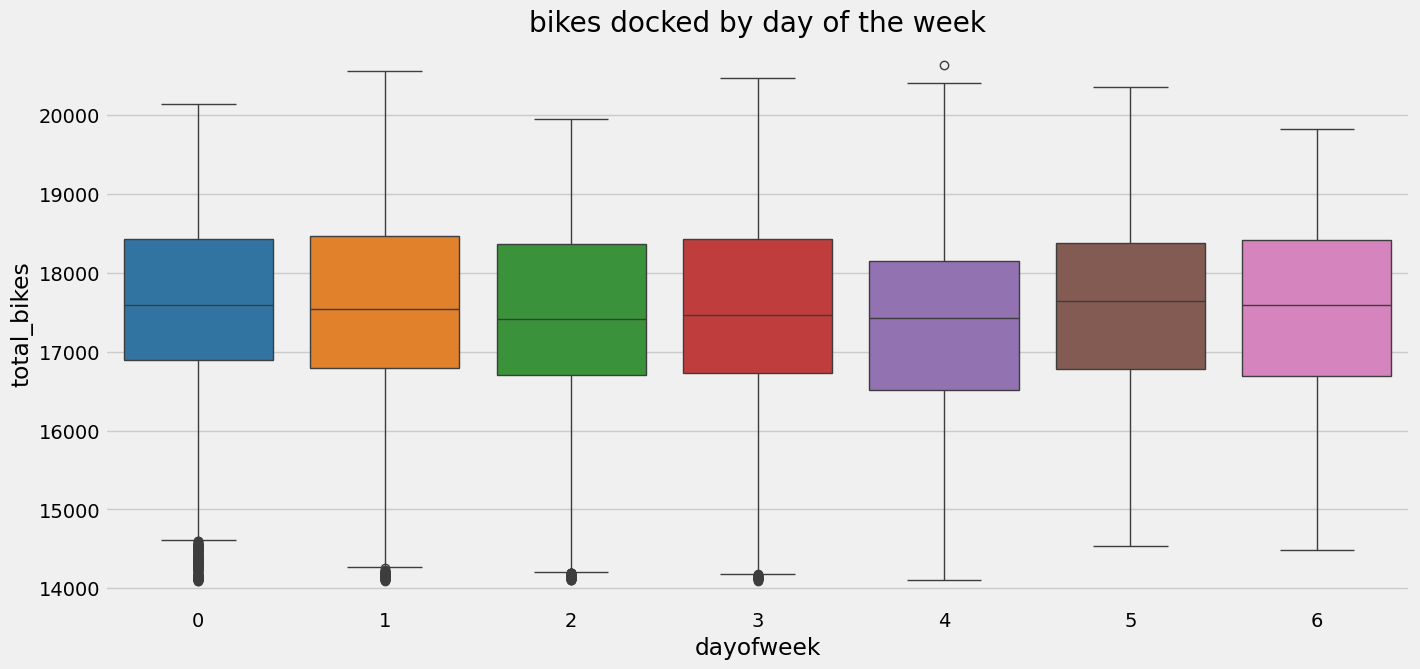

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.boxplot(ax=ax, data=df, x='dayofweek', y='total_bikes', palette=color_pal)
ax.set_title('bikes docked by day of the week')

/tmp/ipykernel_2109977/1661873231.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=df, x='month', y='total_bikes', palette=color_pal)
/tmp/ipykernel_2109977/1661873231.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(ax=ax, data=df, x='month', y='total_bikes', palette=color_pal)


Text(0.5, 1.0, 'bikes docked by month')

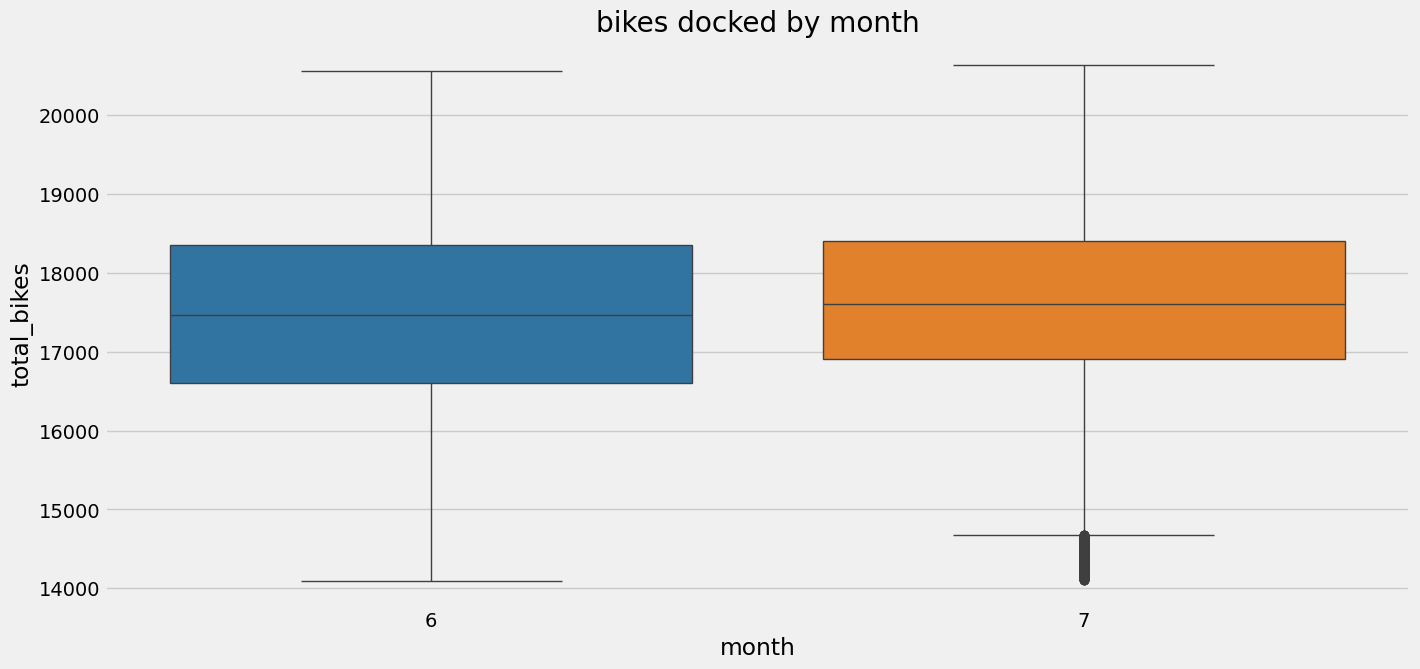

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.boxplot(ax=ax, data=df, x='month', y='total_bikes', palette=color_pal)
ax.set_title('bikes docked by month')

In [28]:
df.shape, df.index

((34219, 8),
 DatetimeIndex(['2024-06-02 18:39:00.474000+00:00',
                '2024-06-02 18:42:00.865000+00:00',
                '2024-06-02 18:43:00.490000+00:00',
                '2024-06-02 18:45:00.432000+00:00',
                '2024-06-02 18:47:00.302000+00:00',
                '2024-06-02 18:49:00.340000+00:00',
                '2024-06-02 18:51:00.486000+00:00',
                '2024-06-02 18:53:00.320000+00:00',
                '2024-06-02 18:55:00.330000+00:00',
                '2024-06-02 18:57:00.464000+00:00',
                ...
                '2024-07-29 00:35:00.513000+00:00',
                '2024-07-29 00:37:00.473000+00:00',
                '2024-07-29 00:39:00.358000+00:00',
                '2024-07-29 00:41:00.351000+00:00',
                '2024-07-29 00:43:00.303000+00:00',
                '2024-07-29 00:45:00.472000+00:00',
                '2024-07-29 00:47:00.508000+00:00',
                '2024-07-29 00:49:00.477000+00:00',
                '2024-07-29 00:

<Figure size 1500x800 with 0 Axes>

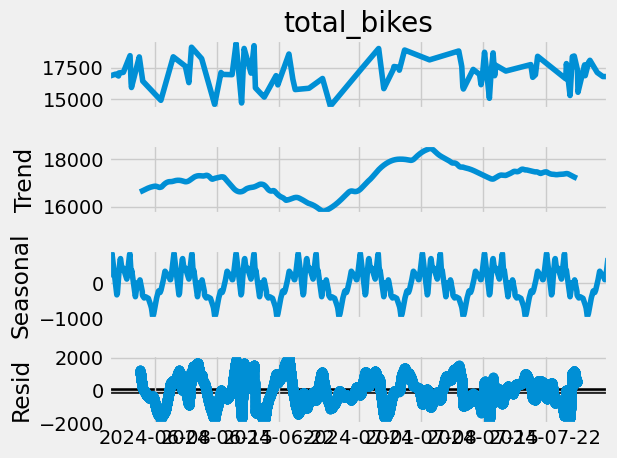

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_2m_interpolated = df.asfreq("2   min").interpolate(method="time")

decomposition = seasonal_decompose(x=df_2m_interpolated["total_bikes"], model="additive", period=5040)
plt.figure(figsize=(15, 8))
decomposition.plot();

In [29]:
df_2m_interpolated.shape, df_2m_interpolated.index

((40509, 8),
 DatetimeIndex(['2024-06-02 18:39:00.474000+00:00',
                '2024-06-02 18:41:00.474000+00:00',
                '2024-06-02 18:43:00.474000+00:00',
                '2024-06-02 18:45:00.474000+00:00',
                '2024-06-02 18:47:00.474000+00:00',
                '2024-06-02 18:49:00.474000+00:00',
                '2024-06-02 18:51:00.474000+00:00',
                '2024-06-02 18:53:00.474000+00:00',
                '2024-06-02 18:55:00.474000+00:00',
                '2024-06-02 18:57:00.474000+00:00',
                ...
                '2024-07-29 00:37:00.474000+00:00',
                '2024-07-29 00:39:00.474000+00:00',
                '2024-07-29 00:41:00.474000+00:00',
                '2024-07-29 00:43:00.474000+00:00',
                '2024-07-29 00:45:00.474000+00:00',
                '2024-07-29 00:47:00.474000+00:00',
                '2024-07-29 00:49:00.474000+00:00',
                '2024-07-29 00:51:00.474000+00:00',
                '2024-07-29 00:

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (12).

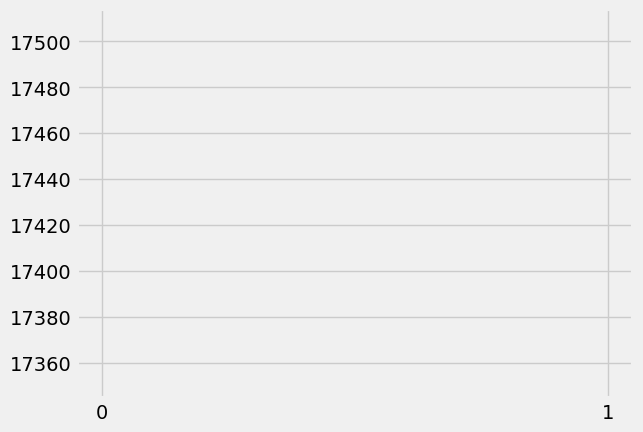

In [30]:
# Month plot need a full year

from statsmodels.graphics.tsaplots import 

month_plot(df['total_bikes'].resample(rule="MS").mean())